In [225]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
df=pd.read_csv('https://lukeb.co//python_csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
import ast 
df['job_skills'] = df['job_skills'].apply(
    lambda skill: ast.literal_eval(skill) if isinstance(skill, str) else skill
)

In [293]:
import seaborn as sns
from adjustText import adjust_text

## what percentage of skill demading

In [228]:
df_US=df[df['job_country']== 'United States'].copy()

In [229]:
df_US_explode=df_US.explode('job_skills')


,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,NaN
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"[python, c++, java, matlab, aws, tensorflow, k..."
5,GCP Data Engineer,"[python, sql, gcp]"
6,Senior Data Engineer - GCP Cloud,"[sql, python, java, sql server, gcp, bigquery,..."
9,Data Scientist II,"[sql, python, r, mongodb, mongodb, sql server,..."
...,...,...
785673,Asset Management Data Scientist,NaN
785685,Data Analyst,"[sql, excel]"
785692,Data Scientist- Hybrid Work Location,"[python, matlab, r]"
785703,Data Analyst - CRYPTOGRAPHY - Full-time,NaN


In [230]:
df_US_count=df_US_explode.groupby(['job_skills','job_title_short']).size()
df_US_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [231]:
df_US_count_skills=df_US_count.reset_index(name='skill_count')
df_US_count_skills

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


In [232]:
df_US_count_skills=df_US_count_skills.sort_values(by='skill_count',ascending=False)
df_US_count_skills

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [233]:
### another way 
job_title=df_US_count_skills['job_title_short'].unique().tolist()
job_title=job_title[:3]
job_title

['Data Scientist', 'Data Analyst', 'Data Engineer']

In [234]:
job_title = sorted(df_US_count_skills['job_title_short'].unique()[0:3]) #sorted for alphabetical order
job_title

['Data Analyst', 'Data Engineer', 'Data Scientist']

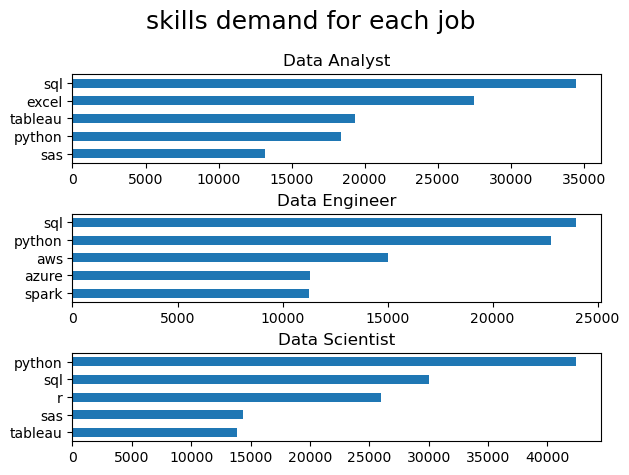

In [235]:
fig, ax = plt.subplots(len(job_title), 1)

for i, title in enumerate(job_title):
    df_plot = df_US_count_skills[df_US_count_skills['job_title_short'] == title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)


fig.suptitle('skills demand for each job ',fontsize=18)
fig.tight_layout(h_pad=0.5) #Height padding = 0.5 inches between subpots fix the overlap
plt.show()

In [236]:
df_US_count_skills


,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [237]:
df_job_title_count=df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
# we convert series to datafram by .reset_index()
#we want merge to df_us_count
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [238]:
df_skills_perc=pd.merge(df_US_count_skills,df_job_title_count,how='left',on='job_title_short')
#jobs_total is matched by rows with the same job_title_short value.
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [258]:
df_skills_perc['skill_percent']= 100* (df_skills_perc['skill_count']/ df_skills_perc['jobs_total'])
df_skills_perc['skill_percent']

0       72.036376
1       50.802171
2       51.052184
3       40.578919
4       44.232534
          ...    
1865     0.055127
1866     0.007724
1867     0.108578
1868     0.236407
1869     0.010765
Name: skill_percent, Length: 1870, dtype: float64

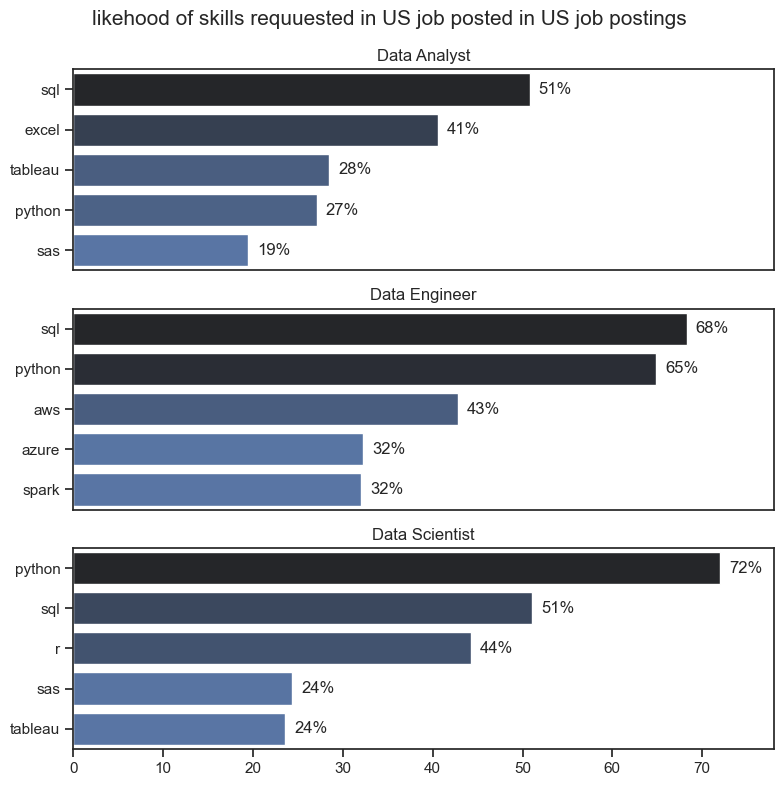

In [292]:
fig, ax = plt.subplots(len(job_title), 1,figsize=(8,8))

sns.set_theme(style='ticks')
for i, title in enumerate(job_title):
        df_plot = df_skills_perc[df_skills_perc['job_title_short'] == title].head(5)
        sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b_r')
        ax[i].set_title(title)
        ax[i].set_ylabel('')
        ax[i].set_xlabel('')
        ax[i].legend().set_visible(False)
        ax[i].set_xlim(0, 78)
        #in seaborn we do not need ax[i].invert becaue we use _r with pallete

        for n,v in enumerate(df_plot['skill_percent']):
                ax[i].text(v+1 ,n,f'{v:.0f}%',va='center') #v+1 to make values apart from bars,va=vertical postion
                # should be loop inside other loop becaue i is unknown so you get error
                #va='center' tells to vertically align the text at the center of the y-position.

        if i !=len(job_title)-1 :
                
                ax[i].set_xticks([]) #ax[i].set_xticks([]) tells Matplotlib to remove all x-axis tick marks and labels from subplot i
fig.suptitle('likehood of skills requuested in US job posted in US job postings ' ,fontsize=15)
fig.tight_layout()
plt.show()

In [ ]:
# use pt.functions to label all data points 

In [287]:
#and pandas’ == expects a single value, not a list, causing a type mismatch or incorrect filtering.

# % of skill in a job posing=(skill count for each job postings )/(total count of job postings)

"""
tolist() converts a pandas Series to Python list, which is necessary for compatibility 
with the enumerate() ( loop) beacuse enumerate()  works best with a Python list
"""

"""
df_US_count['job_title_short'].unique() gets unique job titles from the column; [:3] 
takes the first three; sorted() arranges them alphabetically into a list.
"""

#The sorted() function in sorts an iterable (like a list, tuple, or array)and returns new sorted list.
#syntax: sorted(iterable, key=None, reverse=False), key function to customize sorting (e.g key=str.lower)
"""
you can use slices with the output of functions like unique() if the function returns 
iterable (e.g., a list, array, or pandas Series) like :unique()[:3]
"""

"""
`df_US.groupby(['job_skills','job_title_short']).size()`  
→ Counts **how many times each unique combination** of `job_skills` and `job_title_short` appears.

`df_US['job_title_short'].value_counts()`  
→ Counts **how many times each unique `job_title_short`** appears 
"""

"""
groupby(['job_skills','job_title_short']).size()
→Top 5 most frequently required skills for each job title in US postings,
ranked by raw count of job ads..Used for: hiring plans, training, job postings.
value_counts() on 'job_title_short'
→ See overall "Top 5 most in-demand skills for each job title in US postings, 
ranked by percentage of jobs requiring them.Used for: market trends, staffing, salary benchmarking
"""
"""
Keep ALL rows from the LEFT table
Add matching rows from the RIGHT table
Fill with NaN (missing) where no match
"""

"""
merge(how='left') = Two rules:
Rows:Only rows that exist in the LEFT table1. 
Columns:All columns from BOTH tables
"""
#syntax:plt.Text(x,y,text) sometimes ax[i].text according to stiution

#{v:.0f} = format as float with 0 decimal places → whole number (rounded) 
#"Float format" (.0f) is used to cleanly display percentages — no decimals, no .0, just the number 
"""
Float format" (f) = show any number with exact control over decimal places, rounding, and 
clean output — used for money, percentages, measurements, etc.
examples:code: .2f  result: "45.70" ,code: .0f  result: "46" ,code: f'{2.5:.1f}'  result"2.5"
"""

#if i !=len(job_title)-1 :because len(job_title) - 1 = 2 → last index → hide x-axis on first two plots (i=0,1), 
# keep it only on third plot (i=2) in job_title = ['Data Scientist', 'Data Analyst', 'Data Engineer']

'\nFloat format" (f) = show any number with exact control over decimal places, rounding, and \nclean output — used for money, percentages, measurements, etc.\nexamples:code: .2f  result: "45.70" ,code: .0f  result: "46" ,code: f\'{2.5:.1f}\'  result"2.5"\n'